# Stability Analysis

This notebook recreates some ODE stability analysis for the model of yeast glycolytic oscillations (mygo) as shown/discussed in Lecture 8 slides 8-9 and Lecture 9 of the [Dynamical Modeling Methods for Systems Biology](https://www.coursera.org/learn/dynamical-modeling) course on Coursera.  

## Imports

In [1]:
# NumPy
import numpy as np
# PyPlot from Matplotlib
import matplotlib.pyplot as plt
# The PySB model simulator
from pysb.simulator import ScipyOdeSimulator
# The model.
from mygo import model

First we can setup the simulator:

In [2]:
# Timespan for the simulation in seconds
tspan = np.arange(0, 10*60*20) /10
# Timespand converted to minutes
tspan_min = tspan / 60
# Initialize the simulator
simulator = ScipyOdeSimulator(model, tspan=tspan)

In [3]:
len(tspan)

12000

## Oscillitory behavior

Now we can simulate the model and observe the oscillitory behavior. 

### "stable limit cycle"

When model parameter $K_m = 13$ `mygo` exhibits "stable limit cycle" behavior where the model oscillates indefinitely.

#### Concentrations vs. time:

In [4]:
param_values = np.array([param.value for param in model.parameters])
Km_mask = [param.name=='Km' for param in model.parameters]

In [5]:
param_values[Km_mask] = 13.

In [6]:
yfull_13 = simulator.run(param_values=param_values).all

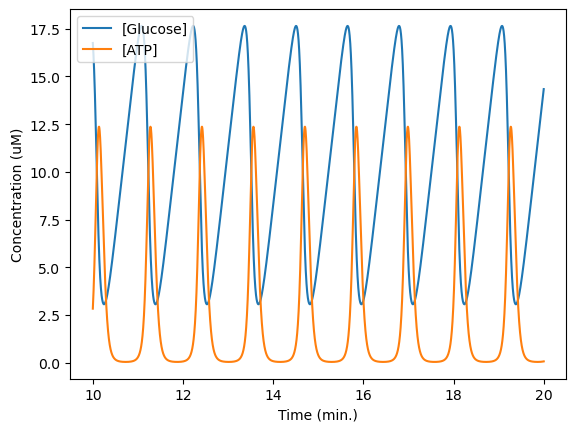

In [7]:
plt.plot(tspan_min[6000:], yfull_13['oG'][6000:], label='[Glucose]')
plt.plot(tspan_min[6000:] , yfull_13['oATP'][6000:], label='[ATP]')
plt.ylabel("Concentration (uM)")
plt.xlabel("Time (min.)")
plt.legend(loc='upper left')
plt.show()

#### phase-plane analysis

We can plot [Glucose] vs. [ATP] to generate a phase-plane plot:

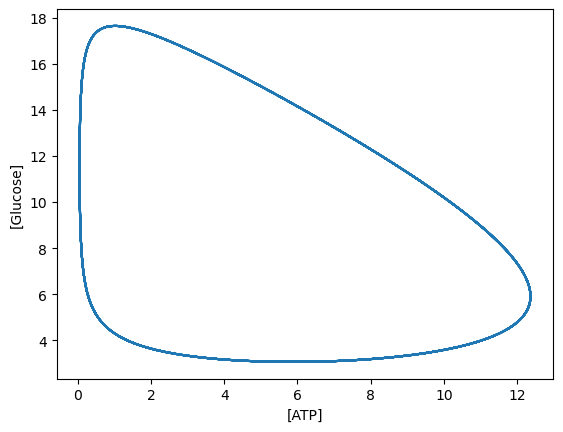

In [8]:
plt.plot(yfull_13['oATP'][6000:], yfull_13['oG'][6000:])
plt.ylabel("[Glucose]")
plt.xlabel("[ATP]")
plt.show()

### "stable fixed point"

When model parameter $K_m = 20$ `mygo` converges to a "stable fixed point", exhibiting damped oscillations up to fixed poit.

#### Concentrations vs. time:

In [9]:
param_values[Km_mask] = 20.

In [10]:
yfull_20 = simulator.run(param_values=param_values).all

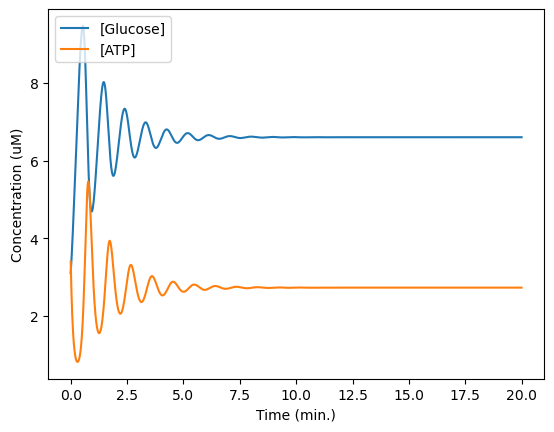

In [11]:
plt.plot(tspan_min, yfull_20['oG'], label='[Glucose]')
plt.plot(tspan_min , yfull_20['oATP'], label='[ATP]')
plt.ylabel("Concentration (uM)")
plt.xlabel("Time (min.)")
plt.legend(loc='upper left')
plt.show()

#### phase-plane analysis

We can plot [Glucose] vs. [ATP] to generate a phase-plane plot:

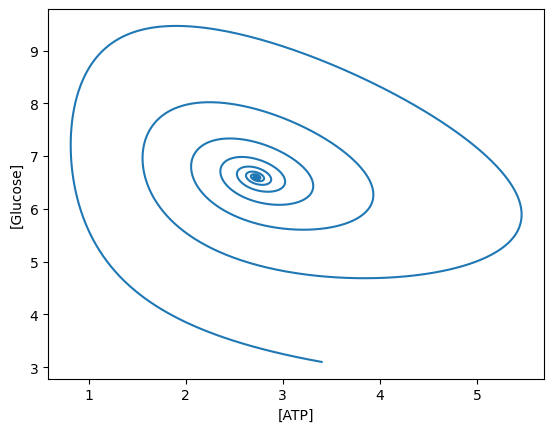

In [12]:
plt.plot(yfull_20['oATP'], yfull_20['oG'])
plt.ylabel("[Glucose]")
plt.xlabel("[ATP]")
plt.show()

## "nullclines"

A nullcline is a set of points where one of the derivatives of the concentration with time is fixed at zero.



In [13]:
atp = np.linspace(0.5,13, 100)

### ATP nullcline
$\frac{d[ATP]}{dt}=0$ and solving for glucose concentration:
$[G] = \frac{k_p}{2k_1([ATP] + K_m)}$



In [14]:
g_atpnull = model.parameters['kp'].value / (2*model.parameters['k1'].value*(atp + model.parameters['Km'].value))

### Glucose nullcline

$\frac{d[G]}{dt}=0$ and solving for glucose concentration:
$[G] = \frac{V_{in}}{k_1[ATP]}$

In [15]:
g_glunull = model.parameters['Vin'].value / (model.parameters['k1'].value * atp)

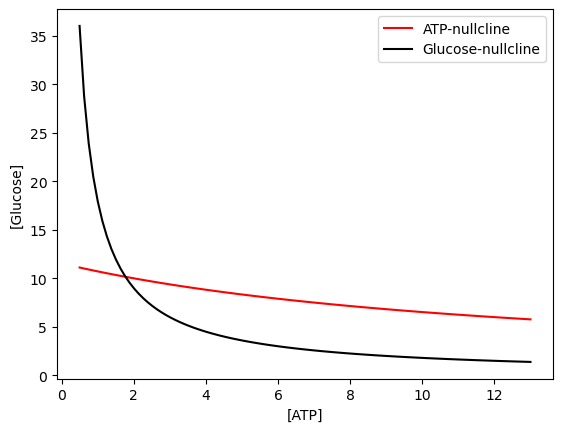

In [16]:
plt.plot(atp, g_atpnull, color='r', label='ATP-nullcline')
plt.plot(atp, g_glunull, color='k', label='Glucose-nullcline')
plt.xlabel('[ATP]')
plt.ylabel('[Glucose]')
plt.legend(loc=0)

### Start the oscillating system close to the fixed point

model parameter $K_m = 13$ 
[ATP] = 2
[Glucose] = 11

In [17]:
model.parameters

ComponentSet([
 Parameter('G_0', 3.1),
 Parameter('ATP_0', 3.4),
 Parameter('Vin', 0.36),
 Parameter('k1', 0.02),
 Parameter('kp', 6.0),
 Parameter('Km', 13.0),
 ])

In [18]:
g0_mask = [param.name=='G_0' for param in model.parameters]

In [19]:
atp0_mask = [param.name=='ATP_0' for param in model.parameters]

In [20]:
param_values[Km_mask] = 13.
param_values[atp0_mask] = 2
param_values[g0_mask] = 11

In [21]:
yfull_13_2 = simulator.run(param_values=param_values).all

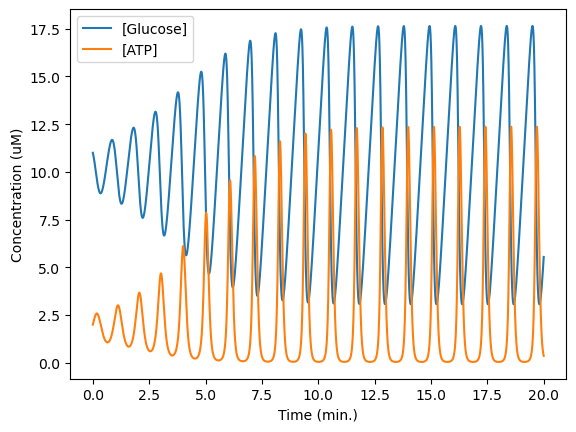

In [22]:
plt.plot(tspan_min, yfull_13_2['oG'], label='[Glucose]')
plt.plot(tspan_min, yfull_13_2['oATP'], label='[ATP]')
plt.ylabel("Concentration (uM)")
plt.xlabel("Time (min.)")
plt.legend(loc='upper left')
plt.show()

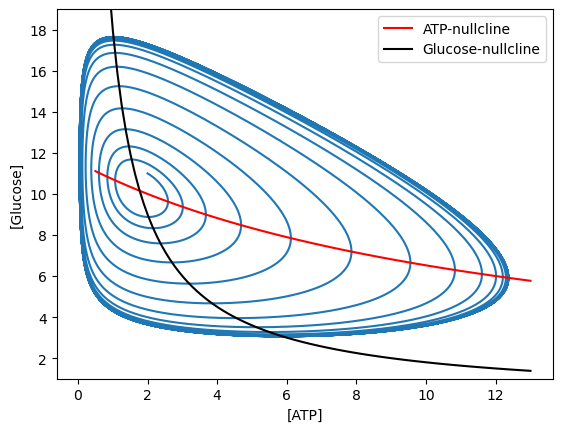

In [23]:
plt.plot(yfull_13_2['oATP'], yfull_13_2['oG'])
plt.plot(atp, g_atpnull, color='r', label='ATP-nullcline')
plt.plot(atp, g_glunull, color='k', label='Glucose-nullcline')
plt.ylabel("[Glucose]")
plt.xlabel("[ATP]")
plt.legend(loc=0)
plt.ylim((1,19))
plt.show()

### Start the non-oscillating away from the fixed point

model parameter $K_m = 20$ 
[ATP] = 10
[Glucose] = 8

In [24]:
param_values[Km_mask] = 20.
param_values[atp0_mask] = 10.
param_values[g0_mask] = 8.

In [25]:
yfull_20_2 = simulator.run(param_values=param_values).all

In [26]:
g_atpnull_20 = model.parameters['kp'].value / (2*model.parameters['k1'].value*(atp + 20.))

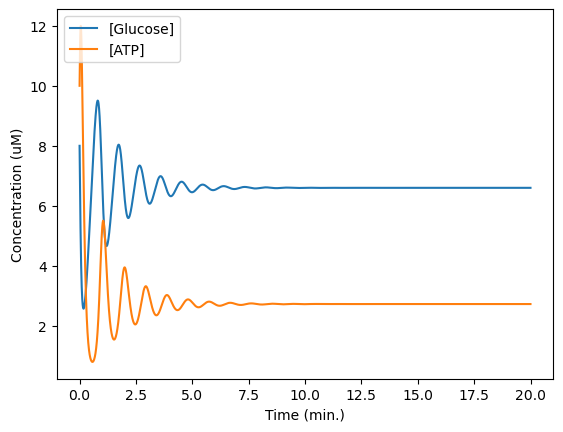

In [27]:
plt.plot(tspan_min, yfull_20_2['oG'], label='[Glucose]')
plt.plot(tspan_min, yfull_20_2['oATP'], label='[ATP]')
plt.ylabel("Concentration (uM)")
plt.xlabel("Time (min.)")
plt.legend(loc='upper left')
plt.show()

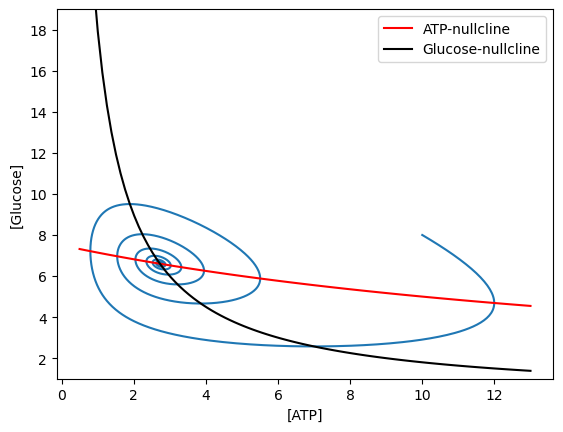

In [28]:
plt.plot(yfull_20_2['oATP'], yfull_20_2['oG'])
plt.plot(atp, g_atpnull_20, color='r', label='ATP-nullcline')
plt.plot(atp, g_glunull, color='k', label='Glucose-nullcline')
plt.ylabel("[Glucose]")
plt.xlabel("[ATP]")
plt.legend(loc=0)
plt.ylim((1,19))
plt.show()

## Bifurcation with changes in $K_m$

In [29]:
Km_vals = np.linspace(10,25, 50, endpoint=True)

In [30]:
glucose_min = []
glucose_max = []
for Km_val in Km_vals:
    param_values[Km_mask] = Km_val
    yfull = simulator.run(param_values=param_values).all
    glucose_min.append(np.min(yfull['oG'][6000:]))
    glucose_max.append(np.max(yfull['oG'][6000:]))

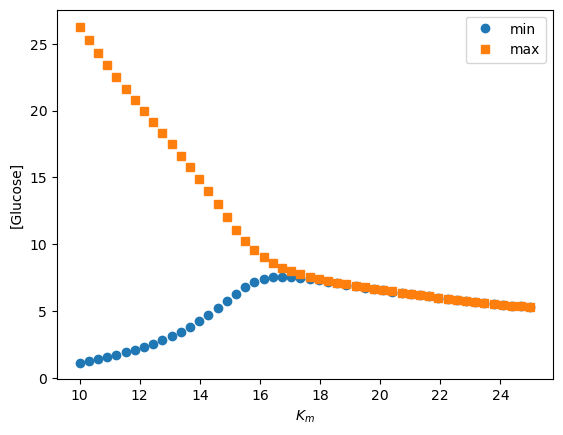

In [31]:
plt.plot(Km_vals, glucose_min, marker='o', linestyle='', label='min')
plt.plot(Km_vals, glucose_max, marker='s', linestyle='', label='max')
plt.ylabel("[Glucose]")
plt.xlabel("$K_m$")
plt.legend(loc=0)

We can see that the system exhibits a bifurcation near $K_m=17$ in which it goes from oscillating in the "stable limit cycle" to not oscillating in the "stable fixed point".